In [6]:
!pip install statsmodels --default-timeout=100

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/fa/e1/60a652f18996a40a7410aeb7eb476c18da8a39792c7effe67f06883e9852/statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached statsmodels-0.14.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Obtaining dependency information for scipy!=1.9.2,>=1.8 from https://files.pythonhosted.org/packages/8e/ee/8a26858ca517e9c64f84b4c7734b89bda8e63bec85c3d2f432d225bb1886/scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/87/2b/b50d3d08ea0fc419c183a84210571eba005328efa62b6b98bc28e9ead32a/patsy-1.0.1-py2.py3-none-any.whl.metadata
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached

In [51]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("data/GlobalTemperatures.csv")

In [25]:
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)
df = df.asfreq('MS')

In [26]:
df['LandAverageTemperature'] = df['LandAverageTemperature'].interpolate(method='linear')

In [27]:
df.isnull().sum()

LandAverageTemperature                          0
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [28]:
train_size = int(len(df) * 0.8)
train_data = df['LandAverageTemperature'].iloc[train_size:]
test_data = df['LandAverageTemperature'].iloc[:train_size]

In [29]:
p, d, q = 5, 1, 0

In [31]:
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

In [33]:
print(model_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                  639
Model:                     ARIMA(5, 1, 0)   Log Likelihood                -455.791
Date:                    Sun, 08 Dec 2024   AIC                            923.581
Time:                            15:15:23   BIC                            950.331
Sample:                        10-01-1962   HQIC                           933.965
                             - 12-01-2015                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3112      0.035      8.773      0.000       0.242       0.381
ar.L2          0.3788      0.039      9.690      0.000       0.302       0.455
ar.L3         -0.032

In [34]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [36]:
predictions = model_fit.predict(start=start, end=end)

In [41]:
print("Train data shape:", train_data.shape)
print("Predictions shape:", predictions.shape)

Train data shape: (639,)
Predictions shape: (2553,)


In [42]:
min_length = min(len(train_data), len(predictions))
aligned_train_data = train_data[-min_length:]
aligned_predictions = predictions[:min_length]

In [43]:
rmse_value = rmse(aligned_train_data, aligned_predictions)
print("Root Mean Squared Error (RMSE):", rmse_value)

Root Mean Squared Error (RMSE): 4.9410333440024825


In [44]:
forecast = model_fit.forecast(steps=120)

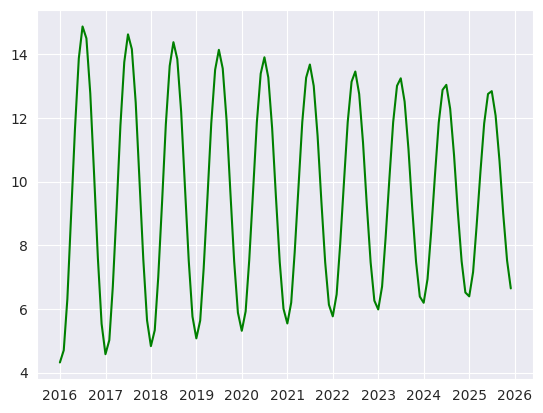

In [48]:
plt.plot(
    pd.date_range(df.index[-1], periods=120, freq='ME'),
    forecast,
    label='Forecast',
    color='green'
)


<Axes: ylabel='predicted_mean'>

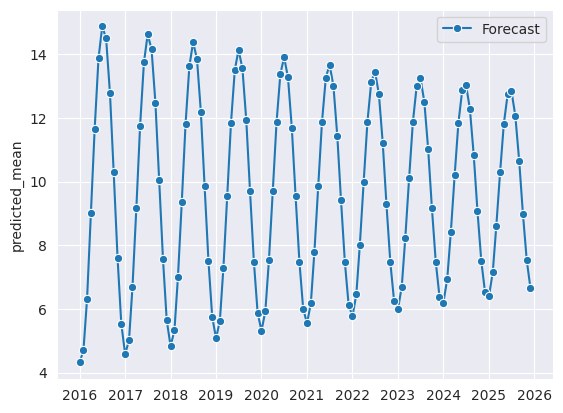

In [52]:
sns.lineplot(forecast, label='Forecast', marker='o')